In [29]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [30]:
digits.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [31]:
print(digits.data[0])


[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [32]:
print(digits.target[0])


0


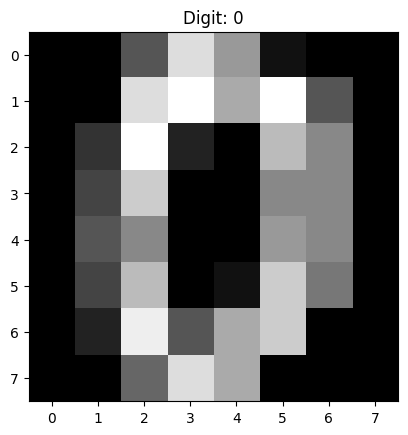

In [33]:
import matplotlib.pyplot as plt

plt.imshow(digits.images[0], cmap='gray')
plt.title(f"Digit: {digits.target[0]}")
plt.show()


In [34]:
X = digits.data
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

In [35]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=8)  # you can change k value later
knn.fit(X_train, y_train)


,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [48]:
y_pred = knn.predict(X_test)


In [49]:
print('\n',accuracy_score(y_test, y_pred))
print('\n',confusion_matrix(y_test, y_pred),'cm')



 0.987037037037037

 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 64  0  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  2  0  0  0  0  0  0 41  0]
 [ 0  0  0  1  1  1  0  0  0 56]] cm


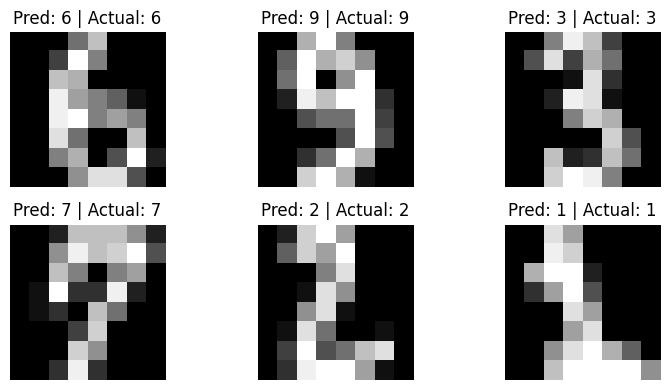

In [50]:
plt.figure(figsize=(8, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"Pred: {y_pred[i]} | Actual: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [51]:
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f"k={k} → Accuracy: {knn.score(X_test, y_test):.3f}")


k=1 → Accuracy: 0.983
k=2 → Accuracy: 0.983
k=3 → Accuracy: 0.989
k=4 → Accuracy: 0.987
k=5 → Accuracy: 0.993
k=6 → Accuracy: 0.994
k=7 → Accuracy: 0.991
k=8 → Accuracy: 0.987
k=9 → Accuracy: 0.981
